Make figures for statistics of the Gaussian components. This includes:

1. Line width as function of galactocentric radius
2. Peak temperature with Rgal
3. Number of components with Rgal
4. ...

In [63]:
from astropy.io import fits
import astropy.units as u
import astropy.constants as c
import os
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import Projection
from scipy import ndimage as nd
from astropy.stats import histogram as astro_hist

from galaxies import Galaxy

osjoin = os.path.join

repo_path = os.path.expanduser("~/ownCloud/project_code/ThickHIFitting/")

figures_path_png = osjoin(repo_path, "figures/png")
figures_path_pdf = osjoin(repo_path, "figures/pdf")


def save_figure(fig, plot_name, **kwargs):
    fig.savefig(f"{figures_path_pdf}/{plot_name}.pdf", **kwargs)
    fig.savefig(f"{figures_path_png}/{plot_name}.png", **kwargs)


paths_script = os.path.join(repo_path, "paths.py")
exec(compile(open(paths_script, "rb").read(), paths_script, 'exec'))

plotstyle_script = os.path.join(repo_path, "plotting_styles.py")
exec(compile(open(plotstyle_script, "rb").read(), plotstyle_script, 'exec'))


In [2]:
m31_multigauss_name = fifteenA_HI_BCtaper_04kms_data_wEBHIS_path("individ_multigaussian_gausspy_fits_neighbcheck2_nomw.fits")
m31_multigauss_hdu = fits.open(m31_multigauss_name)

m31_ngauss = np.isfinite(m31_multigauss_hdu[0].data).sum(0) // 3
m31_maxgauss = np.nanmax(m31_ngauss)

m31_amps = m31_multigauss_hdu[0].data[::3][:m31_maxgauss] * u.K
m31_cents = m31_multigauss_hdu[0].data[1::3][:m31_maxgauss] * u.m / u.s
m31_lwidths = m31_multigauss_hdu[0].data[2::3][:m31_maxgauss] * u.m / u.s

m31_cents = m31_cents.to(u.km / u.s)
m31_lwidths = m31_lwidths.to(u.km / u.s)

# Blend and distinct separations

m31_multigauss_name_distinct = fifteenA_HI_BCtaper_04kms_data_wEBHIS_path("individ_multigaussian_gausspy_fits_neighbcheck2_noMW_distinct.fits")
m31_multigauss_hdu_distinct = fits.open(m31_multigauss_name_distinct)

m31_ngauss_distinct = np.isfinite(m31_multigauss_hdu_distinct[0].data).sum(0) // 3
m31_maxgauss_distinct = np.nanmax(m31_ngauss_distinct)

m31_amps_distinct = m31_multigauss_hdu_distinct[0].data[::3][:m31_maxgauss_distinct] * u.K
m31_cents_distinct = m31_multigauss_hdu_distinct[0].data[1::3][:m31_maxgauss_distinct] * u.m / u.s
m31_lwidths_distinct = m31_multigauss_hdu_distinct[0].data[2::3][:m31_maxgauss_distinct] * u.m / u.s

m31_cents_distinct = m31_cents_distinct.to(u.km / u.s)
m31_lwidths_distinct = m31_lwidths_distinct.to(u.km / u.s)


m31_multigauss_name_blend = fifteenA_HI_BCtaper_04kms_data_wEBHIS_path("individ_multigaussian_gausspy_fits_neighbcheck2_noMW_blend.fits")
m31_multigauss_hdu_blend = fits.open(m31_multigauss_name_blend)

m31_ngauss_blend = np.isfinite(m31_multigauss_hdu_blend[0].data).sum(0) // 3
m31_maxgauss_blend = np.nanmax(m31_ngauss_blend)

m31_amps_blend = m31_multigauss_hdu_blend[0].data[::3][:m31_maxgauss_blend] * u.K
m31_cents_blend = m31_multigauss_hdu_blend[0].data[1::3][:m31_maxgauss_blend] * u.m / u.s
m31_lwidths_blend = m31_multigauss_hdu_blend[0].data[2::3][:m31_maxgauss_blend] * u.m / u.s

m31_cents_blend = m31_cents_blend.to(u.km / u.s)
m31_lwidths_blend = m31_lwidths_blend.to(u.km / u.s)

gal_m31 = Galaxy('M31')

radii_m31 = gal_m31.radius(header=m31_multigauss_hdu[2].header).to(u.kpc)


In [14]:
m33_multigauss_name = fourteenB_HI_data_wGBT_path("individ_multigaussian_gausspy_fits_neighbcheck2_nomw.fits")
m33_multigauss_hdu = fits.open(m33_multigauss_name)

m33_ngauss = np.isfinite(m33_multigauss_hdu[0].data).sum(0) // 3
m33_maxgauss = np.nanmax(m33_ngauss)

m33_amps = m33_multigauss_hdu[0].data[::3][:m33_maxgauss] * u.K
m33_cents = m33_multigauss_hdu[0].data[1::3][:m33_maxgauss] * u.m / u.s
m33_lwidths = m33_multigauss_hdu[0].data[2::3][:m33_maxgauss] * u.m / u.s

m33_cents = m33_cents.to(u.km / u.s)
m33_lwidths = m33_lwidths.to(u.km / u.s)

# Blend and distinct separations

m33_multigauss_name_distinct = fourteenB_HI_data_wGBT_path("individ_multigaussian_gausspy_fits_neighbcheck2_noMW_distinct.fits")
m33_multigauss_hdu_distinct = fits.open(m33_multigauss_name_distinct)

m33_ngauss_distinct = np.isfinite(m33_multigauss_hdu_distinct[0].data).sum(0) // 3
m33_maxgauss_distinct = np.nanmax(m33_ngauss_distinct)

m33_amps_distinct = m33_multigauss_hdu_distinct[0].data[::3][:m33_maxgauss_distinct] * u.K
m33_cents_distinct = m33_multigauss_hdu_distinct[0].data[1::3][:m33_maxgauss_distinct] * u.m / u.s
m33_lwidths_distinct = m33_multigauss_hdu_distinct[0].data[2::3][:m33_maxgauss_distinct] * u.m / u.s

m33_cents_distinct = m33_cents_distinct.to(u.km / u.s)
m33_lwidths_distinct = m33_lwidths_distinct.to(u.km / u.s)


m33_multigauss_name_blend = fourteenB_HI_data_wGBT_path("individ_multigaussian_gausspy_fits_neighbcheck2_noMW_blend.fits")
m33_multigauss_hdu_blend = fits.open(m33_multigauss_name_blend)

m33_ngauss_blend = np.isfinite(m33_multigauss_hdu_blend[0].data).sum(0) // 3
m33_maxgauss_blend = np.nanmax(m33_ngauss_blend)

m33_amps_blend = m33_multigauss_hdu_blend[0].data[::3][:m33_maxgauss_blend] * u.K
m33_cents_blend = m33_multigauss_hdu_blend[0].data[1::3][:m33_maxgauss_blend] * u.m / u.s
m33_lwidths_blend = m33_multigauss_hdu_blend[0].data[2::3][:m33_maxgauss_blend] * u.m / u.s

m33_cents_blend = m33_cents_blend.to(u.km / u.s)
m33_lwidths_blend = m33_lwidths_blend.to(u.km / u.s)

gal_m33 = Galaxy('M33')

radii_m33 = gal_m33.radius(header=m33_multigauss_hdu[2].header).to(u.kpc)


In [4]:
print(f"M31 Max comp: {m31_maxgauss}, max distinct: {m31_maxgauss_distinct}, max blend: {m31_maxgauss_blend}")
print(f"M33 Max comp: {m33_maxgauss}, max distinct: {m33_maxgauss_distinct}, max blend: {m33_maxgauss_blend}")

M31 Max comp: 8, max distinct: 6, max blend: 7
M33 Max comp: 6, max distinct: 4, max blend: 6


/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in less


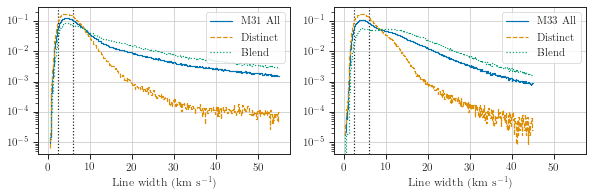

In [5]:
# twocolumn_figure()

twocolumn_twopanel_figure()

cts_lw_m31, bin_edges_lw_m31 = astro_hist(m31_lwidths[np.isfinite(m31_lwidths) &
                                                      (m31_lwidths.value < 55)].value,
                                          bins='knuth', density=True)
bin_centres_lw_m31 = (bin_edges_lw_m31[1:] + bin_edges_lw_m31[:-1]) / 2.

cts_lw_m33, bin_edges_lw_m33 = astro_hist(m33_lwidths[np.isfinite(m33_lwidths) &
                                                      (m33_lwidths.value < 45)].value,
                                          bins='knuth', density=True)
bin_centres_lw_m33 = (bin_edges_lw_m33[1:] + bin_edges_lw_m33[:-1]) / 2.

# Distinct

cts_lw_m31_distinct = astro_hist(m31_lwidths_distinct[np.isfinite(m31_lwidths_distinct) &
                                                      (m31_lwidths_distinct.value < 55)].value,
                                 bins=bin_edges_lw_m31, density=True)[0]

cts_lw_m33_distinct = astro_hist(m33_lwidths_distinct[np.isfinite(m33_lwidths_distinct) &
                                                      (m33_lwidths_distinct.value < 45)].value,
                                 bins=bin_edges_lw_m33, density=True)[0]

# Blend
cts_lw_m31_blend = astro_hist(m31_lwidths_blend[np.isfinite(m31_lwidths_blend) &
                                                (m31_lwidths_blend.value < 55)].value,
                              bins=bin_edges_lw_m31, density=True)[0]

cts_lw_m33_blend = astro_hist(m33_lwidths_blend[np.isfinite(m33_lwidths_blend) &
                                                (m33_lwidths_blend.value < 45)].value,
                              bins=bin_edges_lw_m33, density=True)[0]


fig = plt.figure()
ax = fig.add_subplot(121)

ax.semilogy(bin_centres_lw_m31, cts_lw_m31,
             drawstyle='steps-mid',
             linestyle='-',
             label="M31 All")

ax.semilogy(bin_centres_lw_m31, cts_lw_m31_distinct,
             drawstyle='steps-mid',
             linestyle='--',
             label="Distinct")

ax.semilogy(bin_centres_lw_m31, cts_lw_m31_blend,
             drawstyle='steps-mid',
             linestyle=':',
             label="Blend")

ax2 = fig.add_subplot(122, sharex=ax, sharey=ax)

ax2.semilogy(bin_centres_lw_m33, cts_lw_m33,
             drawstyle='steps-mid',
             linestyle='-',
             label="M33 All")

ax2.semilogy(bin_centres_lw_m33, cts_lw_m33_distinct,
             drawstyle='steps-mid',
             linestyle='--',
             label="Distinct")

ax2.semilogy(bin_centres_lw_m33, cts_lw_m33_blend,
             drawstyle='steps-mid',
             linestyle=':',
             label="Blend")

ax.legend(loc='upper right', frameon=True)
ax2.legend(loc='upper right', frameon=True)

ax.grid()
ax2.grid()

ax.set_xlabel(r"Line width (km s$^{-1})$")
ax2.set_xlabel(r"Line width (km s$^{-1})$")
# plt.ylabel("")


def thermwidth(temp):
    return np.sqrt(c.k_B * temp / (1.4 * c.m_p)).to(u.km / u.s)

ax.axvline(thermwidth(1000 * u.K).value, linestyle=':', color='k', zorder=-1)
ax2.axvline(thermwidth(1000 * u.K).value, linestyle=':', color='k', zorder=-1)

ax.axvline(thermwidth(6000 * u.K).value, linestyle=':', color='k', zorder=-1)
ax2.axvline(thermwidth(6000 * u.K).value, linestyle=':', color='k', zorder=-1)

plt.tight_layout()

plot_name = 'm31_m33_mgauss_lwidth_hist_distinct_blend'

save_figure(fig, plot_name)


Split line widths by Rgal.

/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: Ru

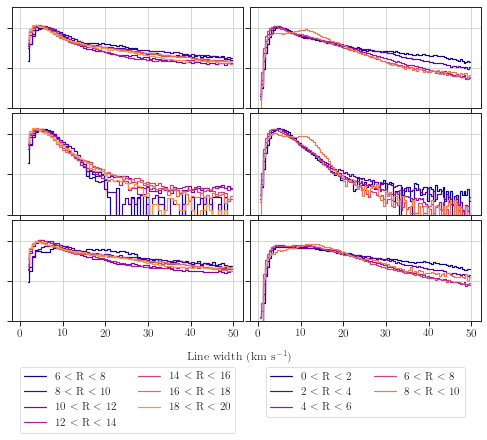

In [68]:
twocolumn_figure()

fig = plt.figure()

# M31

bins_m31 = np.linspace(6, 20, 8) * u.kpc

max_val = 50 * u.km / u.s

ax_m31 = fig.add_subplot(321)
ax_m31_distinct = fig.add_subplot(323, sharex=ax_m31, sharey=ax_m31)
ax_m31_blend = fig.add_subplot(325, sharex=ax_m31, sharey=ax_m31)

for i, (low, high) in enumerate(zip(bins_m31[:-1], bins_m31[1:])):

    bin_locs = np.where(np.logical_and(radii_m31 >= low, radii_m31 < high))

    lwidth_vals = []
    lwidth_distinct_vals = []
    lwidth_blend_vals = []
    
    for j in range(m31_lwidths.shape[0]):
        lwidth_val = m31_lwidths[j][bin_locs].value
        lwidth_vals.append(lwidth_val[np.isfinite(lwidth_val) &
                                      (lwidth_val < max_val.value)])
    for j in range(m31_lwidths_distinct.shape[0]):
        lwidth_val_dist = m31_lwidths_distinct[j][bin_locs].value
        lwidth_distinct_vals.append(lwidth_val_dist[np.isfinite(lwidth_val_dist) &
                                                    (lwidth_val_dist < max_val.value)])
    for j in range(m31_lwidths_blend.shape[0]):
        lwidth_val_blend = m31_lwidths_blend[j][bin_locs].value
        lwidth_blend_vals.append(lwidth_val_blend[np.isfinite(lwidth_val_blend) &
                                                    (lwidth_val_blend < max_val.value)])
        
        
    lwidth_vals = np.hstack(lwidth_vals)
    lwidth_distinct_vals = np.hstack(lwidth_distinct_vals)
    lwidth_blend_vals = np.hstack(lwidth_blend_vals)

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(lwidth_vals,
                                                  bins='knuth',
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(lwidth_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m31.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m31.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(lwidth_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m31_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m31.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(lwidth_blend_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m31_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                             color=plt.cm.plasma(i / bins_m31.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    


# M33
bins_m33 = np.linspace(0, 10, 6) * u.kpc


ax_m33 = fig.add_subplot(322, sharex=ax_m31, sharey=ax_m31)
ax_m33_distinct = fig.add_subplot(324, sharex=ax_m31, sharey=ax_m31)
ax_m33_blend = fig.add_subplot(326, sharex=ax_m31, sharey=ax_m31)


max_val = 50 * u.km / u.s

for i, (low, high) in enumerate(zip(bins_m33[:-1], bins_m33[1:])):

    bin_locs = np.where(np.logical_and(radii_m33 >= low, radii_m33 < high))

    lwidth_vals = []
    lwidth_distinct_vals = []
    lwidth_blend_vals = []
    
    for j in range(m33_lwidths.shape[0]):
        lwidth_val = m33_lwidths[j][bin_locs].value
        lwidth_vals.append(lwidth_val[np.isfinite(lwidth_val) &
                                      (lwidth_val < max_val.value)])
    for j in range(m33_lwidths_distinct.shape[0]):
        lwidth_val_dist = m33_lwidths_distinct[j][bin_locs].value
        lwidth_distinct_vals.append(lwidth_val_dist[np.isfinite(lwidth_val_dist) &
                                                    (lwidth_val_dist < max_val.value)])
    for j in range(m33_lwidths_blend.shape[0]):
        lwidth_val_blend = m33_lwidths_blend[j][bin_locs].value
        lwidth_blend_vals.append(lwidth_val_blend[np.isfinite(lwidth_val_blend) &
                                                    (lwidth_val_blend < max_val.value)])
        
        
    lwidth_vals = np.hstack(lwidth_vals)
    lwidth_distinct_vals = np.hstack(lwidth_distinct_vals)
    lwidth_blend_vals = np.hstack(lwidth_blend_vals)

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(lwidth_vals,
                                                  bins='knuth',
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(lwidth_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m33.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m33.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(lwidth_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m33_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m33.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(lwidth_blend_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m33_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                             color=plt.cm.plasma(i / bins_m33.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    

# ax_m31.legend(frameon=True, loc='upper right', ncol=2)
# ax_m33.legend(frameon=True, loc='upper right', ncol=2)

ax_m31.set_ylim([1e-5, 1.1])

# ax.axvline(0.42, linestyle=':', color='k')
# ax.axvline(5 * 0.42, linestyle=':', color='k')
ax_m31.grid(True)
ax_m31_distinct.grid(True)
ax_m31_blend.grid(True)

ax_m33.grid(True)
ax_m33_distinct.grid(True)
ax_m33_blend.grid(True)

# ax_m33.set_yticklabels([])
ax_m33_distinct.set_yticklabels([])
ax_m33_blend.set_yticklabels([])

lg = ax_m31_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)
lg2 = ax_m33_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)

fig.subplots_adjust(hspace=0.05, wspace=0.03)

fig.text(0.5, 0.04, r'Line width (km s$^{-1}$)', ha='center', va='center')
# fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

plot_name = 'm31_m33_radialbins_mgauss_lwidth_hist_distinct_blend'

# save_figure(fig, plot_name, bbox_extra_artists=(lg, lg2), bbox_inches='tight')
